## Context: 

Open Innovation Challenges attract people from around the world to participate and solve problems. To study why people join such intiatives (their motivations,) researchers have received 9000+ textual data typed in English. Based on previous studies, researchers have obtained 6 major catergories of motivations ("labels"). 

The below task is to use NLP supervised multi-label classification to predict what is the most likely label(s) for each of the 9000+ motivational data submitted by the participants. 


## Credit and disclamier: 

This work is an independent research task undertook by Lihui Lydia Zhang during her resaerch assistant role at MIT. The code has been sanitized to remove the actual data sources,  proprietary and confidential informaiton.  

This below method is largely inspired by these two medium articles and authors:

1. Susan Li, “Multi Label Text Classification with Scikit-Learn,” Towards Data Science,
Apr. 21, 2018. https://towardsdatascience.com/multi-label-text-classification-with-scikitlearn-30714b7819c5

2. Semantic portal, “Multiclass and multilabel algorithms.” http://semantic-portal.net/basemachine-learning-scikit-learn-supervised-multiclass-and-multilabel-algorithms

In [2]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

# Load in files and clean up


In [3]:
Sub_old = pd.read_csv("PreM....csv", encoding = "ISO-8859-1", header=[0])
Sub_old.head()

Sub_new = pd.read_csv("UniqueID_...csv", encoding = "ISO-8859-1", header=[0])
Sub_new.head()
print(len(Sub_old))
print(len(Sub_new))


123
143


In [5]:
# MergedSub = pd.concat([Sub_new, Sub_old], axis=0, sort=False)


MergedSub = Sub_new.merge(Sub_old,on=['UserID'],how='outer') 
MergedSub

,UserID,WhyReg_x,Problem solver: let me solve your problem_x,Competent: Participation is relatively easy for me_x,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges _x,Self-starters: Intrinsic Incentive_x,Extrinsic: External incentive (social/financial/professional)_x,NASA Enthusiats / NASA Bump: I participate mainly because it's NASA_x,Group,WhyReg_y,Problem solver: let me solve your problem_y,Competent: Participation is relatively easy for me_y,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges _y,Self-starters: Intrinsic Incentive_y,Extrinsic: External incentive (social/financial/professional)_y,NASA Enthusiats / NASA Bump: I participate mainly because it's NASA_y
0,29758291,"Since I was young, astronaut was one of my dre...",NaN,NaN,NaN,NaN,NaN,NaN,"1,1","Since I was young, astronaut was one of my dre...",0.0,1.0,1.0,0.0,0.0,0.0
1,30086670,I am in interested to do space engineering.,NaN,NaN,NaN,NaN,NaN,NaN,"1,2",I am in interested to do space engineering.,0.0,0.0,1.0,0.0,0.0,0.0
2,17879915,"In 2016, participated in robotic arm architect...",NaN,NaN,NaN,NaN,NaN,NaN,"1,2","In 2016, participated in robotic arm architect...",0.0,1.0,0.0,0.0,0.0,1.0
3,25809510,I am interested in the advancement of human ci...,NaN,NaN,NaN,NaN,NaN,NaN,"1,1",I am interested in the advancement of human ci...,1.0,0.0,0.0,0.0,0.0,0.0
4,2959350,The challenge of a contest for a NASA projects,NaN,NaN,NaN,NaN,NaN,NaN,"2,2",The challenge of a contest for a NASA projects,0.0,0.0,0.0,0.0,0.0,1.0
5,25833933,I love building and designing new things,NaN,NaN,NaN,NaN,NaN,NaN,"2,2",I love building and designing new things,0.0,0.0,1.0,0.0,0.0,0.0
6,18311987,Being an engineer and passionate about robots ...,NaN,NaN,NaN,NaN,NaN,NaN,"2,2",Being an engineer and passionate about robots ...,0.0,1.0,1.0,0.0,0.0,0.0
7,29834088,Space exploration is not just an aimless endea...,NaN,NaN,NaN,NaN,NaN,NaN,"1,2",Space exploration is not just an aimless endea...,1.0,1.0,1.0,0.0,0.0,0.0
8,29544471,Hello dear NASA! My name is Alexander and i am...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,31470024,I am a robotics engineer who is interested in ...,NaN,NaN,NaN,NaN,NaN,NaN,"1,1",I am a robotics engineer who is interested in ...,0.0,1.0,1.0,0.0,0.0,0.0


In [6]:
MergedSub_1 = MergedSub.drop(MergedSub.columns[2:10], axis = 1)  # drop the first set of groups 
print (len(MergedSub_1))


MergedSub_1

143


,UserID,WhyReg_x,Problem solver: let me solve your problem_y,Competent: Participation is relatively easy for me_y,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges _y,Self-starters: Intrinsic Incentive_y,Extrinsic: External incentive (social/financial/professional)_y,NASA Enthusiats / NASA Bump: I participate mainly because it's NASA_y
0,29758291,"Since I was young, astronaut was one of my dre...",0.0,1.0,1.0,0.0,0.0,0.0
1,30086670,I am in interested to do space engineering.,0.0,0.0,1.0,0.0,0.0,0.0
2,17879915,"In 2016, participated in robotic arm architect...",0.0,1.0,0.0,0.0,0.0,1.0
3,25809510,I am interested in the advancement of human ci...,1.0,0.0,0.0,0.0,0.0,0.0
4,2959350,The challenge of a contest for a NASA projects,0.0,0.0,0.0,0.0,0.0,1.0
5,25833933,I love building and designing new things,0.0,0.0,1.0,0.0,0.0,0.0
6,18311987,Being an engineer and passionate about robots ...,0.0,1.0,1.0,0.0,0.0,0.0
7,29834088,Space exploration is not just an aimless endea...,1.0,1.0,1.0,0.0,0.0,0.0
8,29544471,Hello dear NASA! My name is Alexander and i am...,NaN,NaN,NaN,NaN,NaN,NaN
9,31470024,I am a robotics engineer who is interested in ...,0.0,1.0,1.0,0.0,0.0,0.0


In [7]:
a = MergedSub_1[pd.isna(MergedSub_1['Problem solver: let me solve your problem_y'])]
print(len(a))

20


In [8]:
Sub_new

,UserID,WhyReg,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because it's NASA
0,29758291,"Since I was young, astronaut was one of my dre...",NaN,NaN,NaN,NaN,NaN,NaN
1,30086670,I am in interested to do space engineering.,NaN,NaN,NaN,NaN,NaN,NaN
2,17879915,"In 2016, participated in robotic arm architect...",NaN,NaN,NaN,NaN,NaN,NaN
3,25809510,I am interested in the advancement of human ci...,NaN,NaN,NaN,NaN,NaN,NaN
4,2959350,The challenge of a contest for a NASA projects,NaN,NaN,NaN,NaN,NaN,NaN
5,25833933,I love building and designing new things,NaN,NaN,NaN,NaN,NaN,NaN
6,18311987,Being an engineer and passionate about robots ...,NaN,NaN,NaN,NaN,NaN,NaN
7,29834088,Space exploration is not just an aimless endea...,NaN,NaN,NaN,NaN,NaN,NaN
8,29544471,Hello dear NASA! My name is Alexander and i am...,NaN,NaN,NaN,NaN,NaN,NaN
9,31470024,I am a robotics engineer who is interested in ...,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
MergedSub_2 = MergedSub_1.dropna(subset=['WhyReg_x'])
print(len(MergedSub_2))
MergedSub_2

143


,UserID,WhyReg_x,Problem solver: let me solve your problem_y,Competent: Participation is relatively easy for me_y,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges _y,Self-starters: Intrinsic Incentive_y,Extrinsic: External incentive (social/financial/professional)_y,NASA Enthusiats / NASA Bump: I participate mainly because it's NASA_y
0,29758291,"Since I was young, astronaut was one of my dre...",0.0,1.0,1.0,0.0,0.0,0.0
1,30086670,I am in interested to do space engineering.,0.0,0.0,1.0,0.0,0.0,0.0
2,17879915,"In 2016, participated in robotic arm architect...",0.0,1.0,0.0,0.0,0.0,1.0
3,25809510,I am interested in the advancement of human ci...,1.0,0.0,0.0,0.0,0.0,0.0
4,2959350,The challenge of a contest for a NASA projects,0.0,0.0,0.0,0.0,0.0,1.0
5,25833933,I love building and designing new things,0.0,0.0,1.0,0.0,0.0,0.0
6,18311987,Being an engineer and passionate about robots ...,0.0,1.0,1.0,0.0,0.0,0.0
7,29834088,Space exploration is not just an aimless endea...,1.0,1.0,1.0,0.0,0.0,0.0
8,29544471,Hello dear NASA! My name is Alexander and i am...,NaN,NaN,NaN,NaN,NaN,NaN
9,31470024,I am a robotics engineer who is interested in ...,0.0,1.0,1.0,0.0,0.0,0.0


In [10]:
output = "Merged_Submitted_"+ str(pd.datetime.today().strftime("%m_%d_%Y"))+".csv"
MergedSub_2.to_csv(output,index=False)
print('Merged File Created!')

Merged File Created!


Excel: Handcoded the missing ones (20) in above file and save it as the same file

## Result:  Cleaned file of the 143 motivations with labels identified from inductive coding, becoming the input file that will be split into test&triain for classification 

In [11]:
df = pd.read_csv("Merged_Submitted_09_30_2019.csv", encoding = "ISO-8859-1", header=[0])
df
 

,UserID,WhyReg,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because its NASA
0,29758291,"Since I was young, astronaut was one of my dre...",0,1,1,0,0,0
1,30086670,I am in interested to do space engineering.,0,0,1,0,0,0
2,17879915,"In 2016, participated in robotic arm architect...",0,1,0,0,0,1
3,25809510,I am interested in the advancement of human ci...,1,0,0,0,0,0
4,2959350,The challenge of a contest for a NASA projects,0,0,0,0,0,1
5,25833933,I love building and designing new things,0,0,1,0,0,0
6,18311987,Being an engineer and passionate about robots ...,0,1,1,0,0,0
7,29834088,Space exploration is not just an aimless endea...,1,1,1,0,0,0
8,29544471,Hello dear NASA! My name is Alexander and i am...,0,1,0,0,1,1
9,31470024,I am a robotics engineer who is interested in ...,0,1,1,0,0,0



# Understand the dataset

In [12]:
df['WhyReg'][0]

"Since I was young, astronaut was one of my dream. Even I couldn't follow my dream to become an astronaut now, but this would be the greatest oppotunity for me to use my skill as an Robotic specialist engineer to get involve and be the part of space engineering development. That's why I am registering for this contest.  "

In [13]:
lens = df.WhyReg.str.len()
lens.mean(), lens.std(), lens.max()
# The length of the comments varies a lot.



(146.62237762237763, 127.74632676816121, 679)

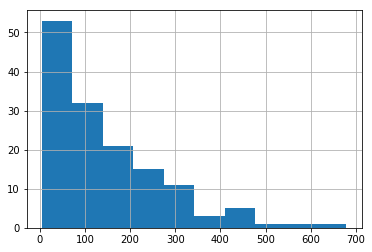

In [14]:
lens.hist()

In [15]:
df.describe()

,UserID,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because its NASA
count,1.430000e+02,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000
mean,2.439002e+07,0.244755,0.482517,0.391608,0.20979,0.125874,0.251748
std,8.346776e+06,0.431453,0.501451,0.489826,0.40859,0.332873,0.435543
min,2.593450e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.137927e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2.790690e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,3.002413e+07,0.000000,1.000000,1.000000,0.00000,0.000000,0.500000
max,3.421440e+07,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Number of comments in each category


In [16]:
df_labels = df.drop(['UserID', 'WhyReg'], axis=1)
counts = []
categories = list(df_labels.columns.values)
for i in categories:
    counts.append((i, df_labels[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,Problem solver: let me solve your problem,35
1,Competent: Participation is relatively easy fo...,69
2,Enthusiats: I am driven by my enthusiasm for s...,56
3,Self-starters: Intrinsic Incentive,30
4,Extrinsic: External incentive (social/financia...,18
5,NASA Enthusiats / NASA Bump: I participate mai...,36


Text(0.5,0,'category')

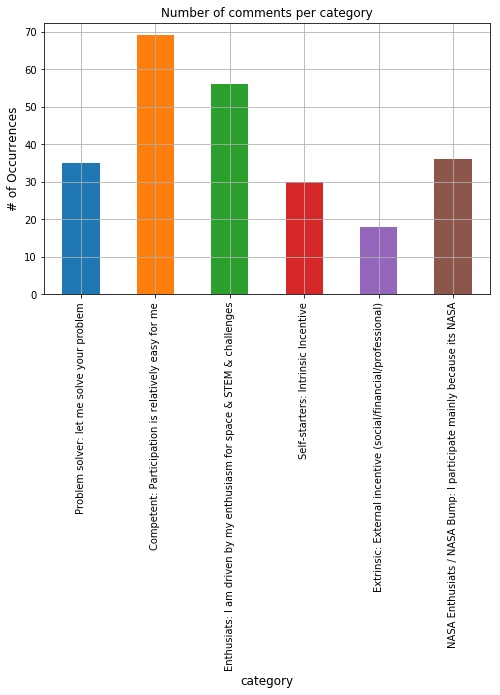

In [17]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

# Multi-Label: How many comments have multiple labels?

1    73
2    42
3    16
0    11
4     1
dtype: int64


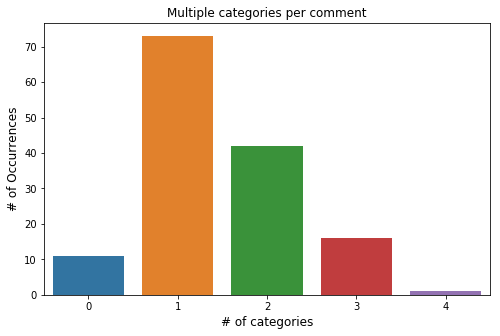

In [19]:
rowsums = df.iloc[:,3:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

print(x)

### Result: Majority of the comment text are labeled with one label only.   


# What is the distribution of the number of words in comment texts?

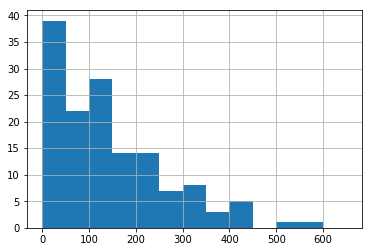

In [52]:
lens = df.WhyReg.str.len()
lens.hist(bins = np.arange(0,700,50))

### Result: Most motivations are within 200 characters, among which less than 50 are most prevalent. 

In [53]:
print('Number of missing comments in comment text:')
df['WhyReg'].isnull().sum()

Number of missing comments in comment text:


0

In [54]:
df

,UserID,WhyReg,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because its NASA
0,29758291,"Since I was young, astronaut was one of my dre...",0,1,1,0,0,0
1,30086670,I am in interested to do space engineering.,0,0,1,0,0,0
2,17879915,"In 2016, participated in robotic arm architect...",0,1,0,0,0,1
3,25809510,I am interested in the advancement of human ci...,1,0,0,0,0,0
4,2959350,The challenge of a contest for a NASA projects,0,0,0,0,0,1
5,25833933,I love building and designing new things,0,0,1,0,0,0
6,18311987,Being an engineer and passionate about robots ...,0,1,1,0,0,0
7,29834088,Space exploration is not just an aimless endea...,1,1,1,0,0,0
8,29544471,Hello dear NASA! My name is Alexander and i am...,0,1,0,0,1,1
9,31470024,I am a robotics engineer who is interested in ...,0,1,1,0,0,0


# Data Preprocessing


In [55]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [56]:
df['WhyReg'] = df['WhyReg'].map(lambda com : clean_text(com))
df['WhyReg'][0]


'since i was young astronaut was one of my dream even i could not follow my dream to become an astronaut now but this would be the greatest oppotunity for me to use my skill as an robotic specialist engineer to get involve and be the part of space engineering development that why i am registering for this contest'

# Split the data to train and test sets:

In [60]:
categories = list(df_labels.columns.values)
train, test = train_test_split(df, random_state=3, test_size=0.33, shuffle=True)
X_train = train.WhyReg
X_test = test.WhyReg
 
print(X_train.shape)
print(X_test.shape)

# output = "X_test_random3_"+ str(pd.datetime.today().strftime("%m_%d_%Y"))+".csv"
# X_test.to_csv(output,index=False)

(95,)
(48,)


# Classifiers Training:

Scikit-learn provides a pipeline utility to help automate machine learning workflows. Pipelines are very common in Machine Learning systems, since there is a lot of data to manipulate and many data transformations to apply. So we will utilize pipeline to train every classifier.



## 1. OneVsRest multi-label strategy

The Multi-label algorithm accepts a binary mask over multiple labels. The result for each prediction will be an array of 0s and 1s marking which class labels apply to each row input sample.

In [174]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(prediction)

... Processing Problem solver: let me solve your problem
Test accuracy is 0.8125
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
... Processing Competent: Participation is relatively easy for me
Test accuracy is 0.75
[1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 1 1 1 0 1]
... Processing Enthusiats: I am driven by my enthusiasm for space & STEM & challenges
Test accuracy is 0.7291666666666666
[0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
... Processing Self-starters: Intrinsic Incentive
Test accuracy is 0.8333333333333334
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
... Processing Extrinsic: External incentive (social/financial/professional)
Test accuracy is 0.8541666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
... Processing 

## 2. LinearSVC

In [175]:
c = pd.DataFrame()
print(c)

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    c[category] = prediction

print(c)

output = "NLP_LinearSVC_Submitted_random3_"+ str(pd.datetime.today().strftime("%m_%d_%Y"))+".csv"
c.to_csv(output,index=False)

Empty DataFrame
Columns: []
Index: []
... Processing Problem solver: let me solve your problem
Test accuracy is 0.8125
... Processing Competent: Participation is relatively easy for me
Test accuracy is 0.7291666666666666
... Processing Enthusiats: I am driven by my enthusiasm for space & STEM & challenges
Test accuracy is 0.75
... Processing Self-starters: Intrinsic Incentive
Test accuracy is 0.8125
... Processing Extrinsic: External incentive (social/financial/professional)
Test accuracy is 0.8958333333333334
... Processing NASA Enthusiats / NASA Bump: I participate mainly because its NASA
Test accuracy is 0.9375
    Problem solver: let me solve your problem  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           1   
6                                  

In [176]:
c.describe()
#results of linear SVC 

,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because its NASA
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.125000,0.604167,0.291667,0.062500,0.041667,0.125000
std,0.334219,0.494204,0.459340,0.244623,0.201941,0.334219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
df.describe()

,UserID,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challenges,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because its NASA
count,1.430000e+02,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000
mean,2.439002e+07,0.244755,0.482517,0.384615,0.20979,0.125874,0.251748
std,8.346776e+06,0.431453,0.501451,0.488214,0.40859,0.332873,0.435543
min,2.593450e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.137927e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2.790690e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,3.002413e+07,0.000000,1.000000,1.000000,0.00000,0.000000,0.500000
max,3.421440e+07,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 3. Logistic Regression

In [178]:
a = pd.DataFrame()
print(a)

LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
     # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
     # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(prediction)
    a[category] = prediction

print(a)

# output = "NLP_LOG_1.csv"
# a.to_csv(output,index=False)



Empty DataFrame
Columns: []
Index: []
... Processing Problem solver: let me solve your problem
Test accuracy is 0.8125
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
... Processing Competent: Participation is relatively easy for me
Test accuracy is 0.75
[1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 1 1 1 0 1 1 1 1 0 1]
... Processing Enthusiats: I am driven by my enthusiasm for space & STEM & challenges
Test accuracy is 0.7083333333333334
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]
... Processing Self-starters: Intrinsic Incentive
Test accuracy is 0.8333333333333334
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
... Processing Extrinsic: External incentive (social/financial/professional)
Test accuracy is 0.8541666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

In [179]:
# Cross reference testing data set and the prediction

# b = X_test.to_frame()
# b
# output = "NLP_LOG_testing.csv"
# b.to_csv(output,index=False)
 

# Try applying the models to unseen data (the ACS registered population with their 9000+ motivations)

In [185]:
df_reg = pd.read_csv('UniqueID_Merged_Master_Survey_Formatted.csv', encoding = "ISO-8859-1", header=[0])
df_reg=df_reg.astype(str)
# df_p.rename(columns={‘Plot’:’plot_text’, ‘Title’:’title’}, inplace=True)
df_reg.head()
print(len(df_reg))

9377


In [181]:
print('Number of missing comments in comment text:')
df_reg['WhyReg'].isnull().sum()
print(len(df_reg)) 
# df_reg = df_reg.drop_duplicates(subset='UserID', keep='first')
# print(len(df_reg))
df_reg.head()

 

Number of missing comments in comment text:
9377


,UserID,WhyReg,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challengesÊ,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because it's NASA
0,29758291,"Since I was young, astronaut was one of my dre...",nan,nan,nan,nan,nan,nan
1,30086670,I am in interested to do space engineering.,nan,nan,nan,nan,nan,nan
2,17879915,"In 2016, participated in robotic arm architect...",nan,nan,nan,nan,nan,nan
3,25809510,I am interested in the advancement of human ci...,nan,nan,nan,nan,nan,nan
4,2959350,The challenge of a contest for a NASA projects,nan,nan,nan,nan,nan,nan


## Data clean up and preprocessing

In [182]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [183]:
# print(type(df_reg['WhyReg'][4]))
df_reg['WhyReg'] = df_reg['WhyReg'].map(lambda com : clean_text(com))
df_reg

,UserID,WhyReg,Problem solver: let me solve your problem,Competent: Participation is relatively easy for me,Enthusiats: I am driven by my enthusiasm for space & STEM & challengesÊ,Self-starters: Intrinsic Incentive,Extrinsic: External incentive (social/financial/professional),NASA Enthusiats / NASA Bump: I participate mainly because it's NASA
0,29758291,since i was young astronaut was one of my drea...,nan,nan,nan,nan,nan,nan
1,30086670,i am in interested to do space engineering,nan,nan,nan,nan,nan,nan
2,17879915,in 2016 participated in robotic arm architectu...,nan,nan,nan,nan,nan,nan
3,25809510,i am interested in the advancement of human ci...,nan,nan,nan,nan,nan,nan
4,2959350,the challenge of a contest for a nasa projects,nan,nan,nan,nan,nan,nan
5,25833933,i love building and designing new things,nan,nan,nan,nan,nan,nan
6,18311987,being an engineer and passionate about robots ...,nan,nan,nan,nan,nan,nan
7,29834088,space exploration is not just an aimless endea...,nan,nan,nan,nan,nan,nan
8,29544471,hello dear nasa my name is alexander and i am ...,nan,nan,nan,nan,nan,nan
9,31470024,i am a robotics engineer who is interested in ...,nan,nan,nan,nan,nan,nan


## Apply the SVC classifer to the data. It outputs the predicted catergories for each motivation in an exported file


In [184]:
d = pd.DataFrame()
print(d)

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(df_reg['WhyReg'])
#     print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    d[category] = prediction

print(d)


output = "NLP_LinearSVC_Reg_random3_"+ str(pd.datetime.today().strftime("%m_%d_%Y"))+".csv"
d.to_csv(output,index=False)


Empty DataFrame
Columns: []
Index: []
... Processing Problem solver: let me solve your problem
... Processing Competent: Participation is relatively easy for me
... Processing Enthusiats: I am driven by my enthusiasm for space & STEM & challenges
... Processing Self-starters: Intrinsic Incentive
... Processing Extrinsic: External incentive (social/financial/professional)
... Processing NASA Enthusiats / NASA Bump: I participate mainly because its NASA
      Problem solver: let me solve your problem  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   
6                                             0   
7                                             1   
8                                             0   
9                                 